In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [93]:
df = pd.read_csv('datasets_Life Expectancy Data_No_blanks.csv')
df.head(20)
dataset =  df
print(dataset.values)


[['Afghanistan' 2015 'Developing' ... 17.3 0.479 10.1]
 ['Afghanistan' 2014 'Developing' ... 17.5 0.47600000000000003 10.0]
 ['Afghanistan' 2013 'Developing' ... 17.7 0.47 9.9]
 ...
 ['Zimbabwe' 2002 'Developing' ... 1.3 0.42700000000000005 10.0]
 ['Zimbabwe' 2001 'Developing' ... 1.7 0.42700000000000005 9.8]
 ['Zimbabwe' 2000 'Developing' ... 11.2 0.434 9.8]]


In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
#X = np.array(ct.fit_transform(df), dtype= object)
#print(X)
df["Country"]= df["Country"].astype('category')
df.dtypes
df["Status"]= df["Status"].astype('category')
df.dtypes
df["Country"]= df["Country"].cat.codes
df["Status"]= df["Status"].cat.codes
#for i in range(20,60,1):
#    print(df.iloc[i,[0,22]],df.iloc[i,[2,23]])
#print(df.iloc[0:20,[0,22]],'\n\n',df.iloc[0:20,[2,23]])

In [95]:
df.describe()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,...,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1.601000e+03,1601.000000,1601.000000,1601.000000,1601.000000
mean,66.148657,2007.960650,0.848844,69.391630,167.592130,33.461587,4.623260,715.376178,79.296065,2288.655840,...,83.687695,5.987995,84.465334,2.034916,5682.787714,1.505792e+07,4.786821,4.840725,0.650486,12.171143
std,38.683642,4.061598,0.358312,8.876531,126.032532,122.529894,4.046706,1782.549852,25.582436,10229.009962,...,22.378531,2.286342,21.153905,6.114317,11622.097831,7.146963e+07,4.518185,4.560669,0.149006,2.788580
min,0.000000,2000.000000,0.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,...,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.279000,4.200000
25%,33.000000,2005.000000,1.000000,64.600000,76.000000,1.000000,0.870000,38.427908,75.000000,0.000000,...,81.000000,4.460000,82.000000,0.100000,464.184650,2.148660e+05,1.600000,1.600000,0.529000,10.400000
50%,67.000000,2008.000000,1.000000,71.800000,147.000000,3.000000,3.940000,149.480209,91.000000,15.000000,...,93.000000,5.860000,93.000000,0.100000,1642.837974,1.457295e+06,3.000000,3.100000,0.677000,12.300000
75%,100.000000,2011.000000,1.000000,75.000000,225.000000,23.000000,7.410000,526.378064,96.000000,394.000000,...,97.000000,7.470000,97.000000,0.700000,4792.652880,8.177693e+06,7.000000,7.100000,0.754000,14.000000
max,132.000000,2015.000000,1.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,...,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
Country                            1601 non-null int16
Year                               1601 non-null int64
Status                             1601 non-null int8
Life expectancy                    1601 non-null float64
Adult Mortality                    1601 non-null int64
infant deaths                      1601 non-null int64
Alcohol                            1601 non-null float64
percentage expenditure             1601 non-null float64
Hepatitis B                        1601 non-null int64
Measles                            1601 non-null int64
 BMI                               1601 non-null float64
under-five deaths                  1601 non-null int64
Polio                              1601 non-null int64
Total expenditure                  1601 non-null float64
Diphtheria                         1601 non-null int64
 HIV/AIDS                          1601 non-null float64
GD

In [97]:
X=dataset.iloc[:,2:]
y=dataset.iloc[:,3]
print (X)
print(y)



      Status  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0          1              65.0              263             62     0.01   
1          1              59.9              271             64     0.01   
2          1              59.9              268             66     0.01   
3          1              59.5              272             69     0.01   
4          1              59.2              275             71     0.01   
...      ...               ...              ...            ...      ...   
1596       1              44.3              723             27     4.36   
1597       1              44.5              715             26     4.06   
1598       1              44.8               73             25     4.43   
1599       1              45.3              686             25     1.72   
1600       1              46.0              665             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         

In [98]:

from sklearn.preprocessing import MinMaxScaler

x = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns[2:])

print(df)


      Status  Life expectancy   Adult Mortality  infant deaths   Alcohol  \
0        1.0          0.466667         0.362881       0.038750  0.000000   
1        1.0          0.353333         0.373961       0.040000  0.000000   
2        1.0          0.353333         0.369806       0.041250  0.000000   
3        1.0          0.344444         0.375346       0.043125  0.000000   
4        1.0          0.337778         0.379501       0.044375  0.000000   
...      ...               ...              ...            ...       ...   
1596     1.0          0.006667         1.000000       0.016875  0.243561   
1597     1.0          0.011111         0.988920       0.016250  0.226764   
1598     1.0          0.017778         0.099723       0.015625  0.247480   
1599     1.0          0.028889         0.948753       0.015625  0.095745   
1600     1.0          0.044444         0.919668       0.015000  0.093505   

      percentage expenditure  Hepatitis B  Measles       BMI   \
0                   0.

In [99]:
# What is the correlation between variables?

correlation=df.corr(method='pearson')
print(correlation)

                                   Status  Life expectancy   Adult Mortality  \
Status                           1.000000         -0.442261         0.279336   
Life expectancy                 -0.442261          1.000000        -0.702675   
Adult Mortality                  0.279336         -0.702675         1.000000   
infant deaths                    0.112272         -0.172593         0.043960   
Alcohol                         -0.606356          0.398834        -0.172588   
percentage expenditure          -0.459745          0.408550        -0.237614   
Hepatitis B                     -0.141640          0.207293        -0.114744   
Measles                          0.074846         -0.071493        -0.002847   
 BMI                            -0.300888          0.547554        -0.354821   
under-five deaths                0.113414         -0.195981         0.062067   
Polio                           -0.203793          0.335180        -0.208745   
Total expenditure               -0.19110

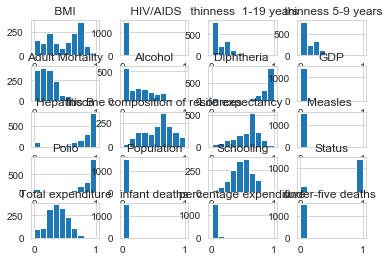

In [100]:
#There are various kinds of visualizations we can try with python..We already 
#saw scatter and line plots.. Lets look at histograms 
#Histograms
from matplotlib import pyplot
df.hist()
pyplot.show()


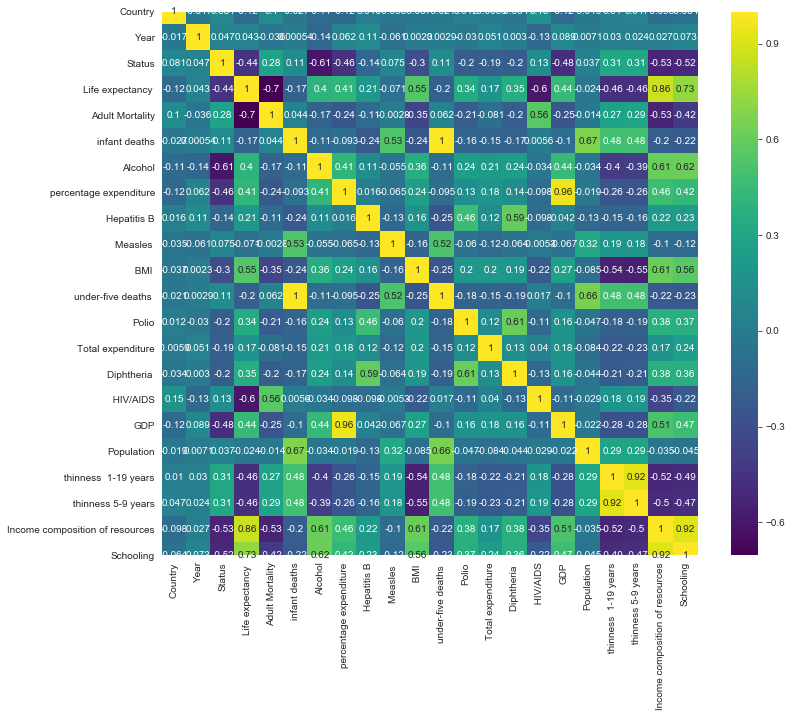

In [101]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),cmap='viridis',annot=True)

In [102]:
df.columns

Index(['Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

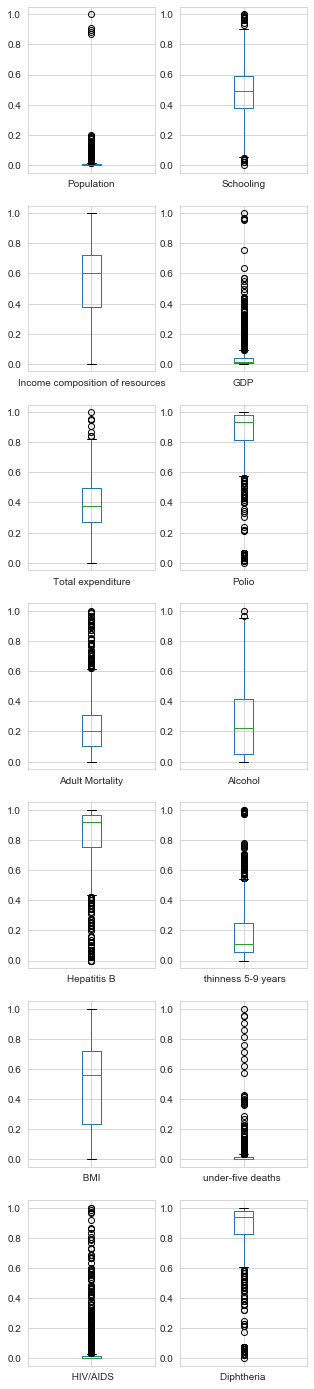

In [104]:
fig, axes = plt.subplots(7,2,figsize=(5,25))
df.boxplot(column= 'Population', ax=axes[0,0])

df.boxplot(column='Schooling',ax=axes[0,1])

df.boxplot(column='Income composition of resources',ax=axes[1,0])
df.boxplot(column='GDP',ax=axes[1,1])

df.boxplot(column='Total expenditure',ax=axes[2,0])
df.boxplot(column='Polio',ax=axes[2,1])

df.boxplot(column='Adult Mortality',ax=axes[3,0])
df.boxplot(column='Alcohol',ax=axes[3,1])

df.boxplot(column='Hepatitis B',ax=axes[4,0])
df.boxplot(column=' thinness 5-9 years',ax=axes[4,1])

df.boxplot(column=' BMI ',ax=axes[5,0])
df.boxplot(column='under-five deaths ',ax=axes[5,1])

df.boxplot(column=' HIV/AIDS',ax=axes[6,0])
df.boxplot(column='Diphtheria ',ax=axes[6,1])

In [105]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Status                             0.000000
Life expectancy                    0.231111
Adult Mortality                    0.206371
infant deaths                      0.013750
Alcohol                            0.366181
percentage expenditure             0.025734
Hepatitis B                        0.216495
Measles                            0.002998
 BMI                               0.479361
under-five deaths                  0.014762
Polio                              0.166667
Total expenditure                  0.220513
Diphtheria                         0.154639
 HIV/AIDS                          0.011881
GDP                                0.036321
Population                         0.006154
 thinness  1-19 years              0.199262
 thinness 5-9 years                0.195730
Income composition of resources    0.342466
Schooling                          0.218182
dtype: float64


In [106]:
df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [122]:
df_clean.corr()['Life expectancy '].sort_values(ascending=False)

Life expectancy                    1.000000
Income composition of resources    0.754016
Schooling                          0.592695
 BMI                               0.395731
percentage expenditure             0.347552
GDP                                0.309911
Alcohol                            0.283524
Total expenditure                  0.280749
Diphtheria                         0.238121
Polio                              0.219717
Hepatitis B                        0.196469
Population                        -0.022030
Measles                           -0.221621
infant deaths                     -0.285822
 thinness 5-9 years               -0.340079
 thinness  1-19 years             -0.346086
under-five deaths                 -0.348093
 HIV/AIDS                         -0.506372
Adult Mortality                   -0.513960
Status                                  NaN
Name: Life expectancy , dtype: float64

In [107]:
df_clean.shape

(566, 20)

In [108]:
print(df_clean)

      Status  Life expectancy   Adult Mortality  infant deaths   Alcohol  \
16       1.0          0.751111         0.101108            0.0  0.256999   
17       1.0          0.744444         0.009695            0.0  0.251960   
18       1.0          0.737778         0.114958            0.0  0.265957   
19       1.0          0.731111         0.117729            0.0  0.287234   
20       1.0          0.724444         0.120499            0.0  0.300112   
...      ...               ...              ...            ...       ...   
1570     1.0          0.604444         0.193906            0.0  0.047032   
1571     1.0          0.600000         0.199446            0.0  0.050392   
1572     1.0          0.755556         0.204986            0.0  0.045913   
1573     1.0          0.688889         0.210526            0.0  0.065510   
1575     1.0          0.600000         0.221607            0.0  0.055431   

      percentage expenditure  Hepatitis B  Measles       BMI   \
16                  0.

In [109]:
df_clean.corr()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life expectancy,NaN,1.000000,-0.513960,-0.285822,0.283524,0.347552,0.196469,-0.221621,0.395731,-0.348093,0.219717,0.280749,0.238121,-0.506372,0.309911,-0.022030,-0.346086,-0.340079,0.754016,0.592695
Adult Mortality,NaN,-0.513960,1.000000,0.184131,-0.003962,-0.141254,-0.164704,0.084810,-0.252309,0.206445,-0.166960,-0.131384,-0.176249,0.295163,-0.121158,0.074975,0.102362,0.103763,-0.366812,-0.300585
infant deaths,NaN,-0.285822,0.184131,1.000000,-0.180792,-0.122284,-0.081259,0.231684,-0.151929,0.987760,-0.108013,-0.016408,-0.088958,0.200518,-0.122375,0.297302,0.094715,0.085675,-0.322243,-0.342642
Alcohol,NaN,0.283524,-0.003962,-0.180792,1.000000,0.240754,0.188597,-0.122612,0.229621,-0.195394,0.288048,0.133128,0.296856,-0.115266,0.233987,0.062175,-0.289814,-0.287889,0.498010,0.427111
percentage expenditure,NaN,0.347552,-0.141254,-0.122284,0.240754,1.000000,0.105742,-0.133490,0.206019,-0.143459,0.070001,0.145778,0.087241,-0.208509,0.838372,0.020561,-0.116409,-0.124829,0.381216,0.318290
Hepatitis B,NaN,0.196469,-0.164704,-0.081259,0.188597,0.105742,1.000000,-0.091760,0.021354,-0.104752,0.795561,0.097231,0.847472,-0.208744,0.144421,0.014962,0.007710,0.002777,0.295073,0.290753
Measles,NaN,-0.221621,0.084810,0.231684,-0.122612,-0.133490,-0.091760,1.000000,-0.086165,0.240274,-0.129909,-0.076827,-0.122505,0.080758,-0.098021,0.054211,0.222005,0.216367,-0.150232,-0.125951
BMI,NaN,0.395731,-0.252309,-0.151929,0.229621,0.206019,0.021354,-0.086165,1.000000,-0.192080,0.037578,0.123569,0.033649,-0.295930,0.206801,0.017224,-0.552063,-0.556946,0.477522,0.414375
under-five deaths,NaN,-0.348093,0.206445,0.987760,-0.195394,-0.143459,-0.104752,0.240274,-0.192080,1.000000,-0.139174,-0.025920,-0.118390,0.254278,-0.147255,0.297148,0.141451,0.127851,-0.386307,-0.391980


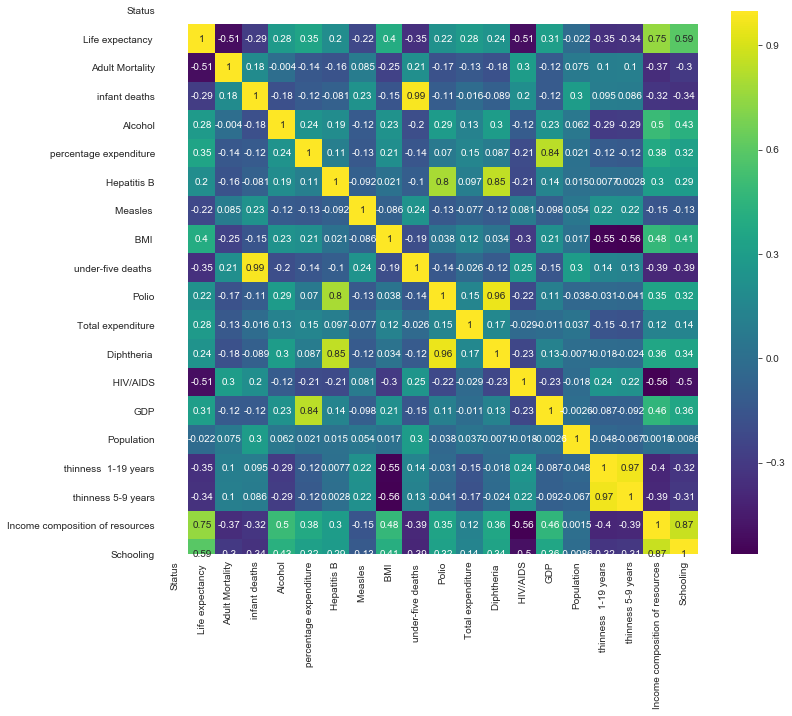

In [110]:
plt.figure(figsize=(12,10))
sns.heatmap(df_clean.corr(),cmap='viridis',annot=True)

In [118]:
xx=df_clean.iloc[:,2:]
yy=df_clean.iloc[:,1]
print(xx)
print(yy)


      Adult Mortality  infant deaths   Alcohol  percentage expenditure  \
16           0.101108            0.0  0.256999                0.019248   
17           0.009695            0.0  0.251960                0.022612   
18           0.114958            0.0  0.265957                0.022724   
19           0.117729            0.0  0.287234                0.021752   
20           0.120499            0.0  0.300112                0.023050   
...               ...            ...       ...                     ...   
1570         0.193906            0.0  0.047032                0.024153   
1571         0.199446            0.0  0.050392                0.024886   
1572         0.204986            0.0  0.045913                0.019044   
1573         0.210526            0.0  0.065510                0.018213   
1575         0.221607            0.0  0.055431                0.002278   

      Hepatitis B  Measles       BMI   under-five deaths      Polio  \
16       1.000000  0.000000  0.745672   

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.2, random_state = 0)

In [120]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.0033179977109428164 0.5129568052270193


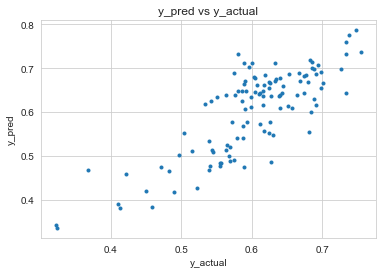

In [121]:
y_pred = regressor.predict(X_test)
plt.plot(y_pred,y_test,'.')
plt.title('y_pred vs y_actual')
plt.ylabel('y_pred')
plt.xlabel('y_actual')
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_pred, y_test)
r2=r2_score(y_pred, y_test)
print(mse,r2)